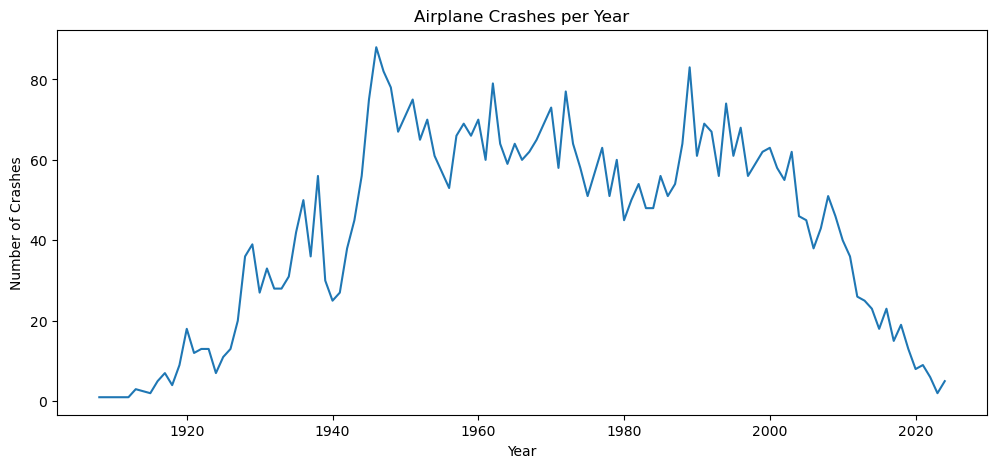

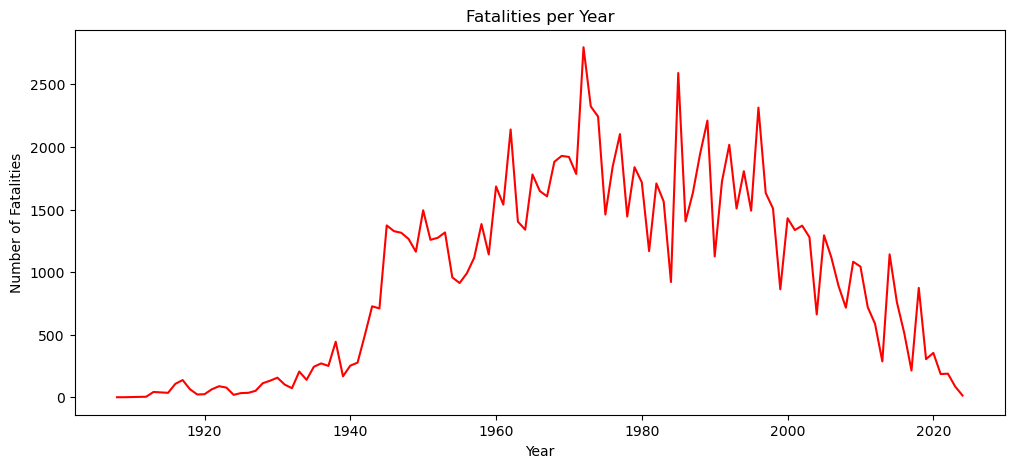

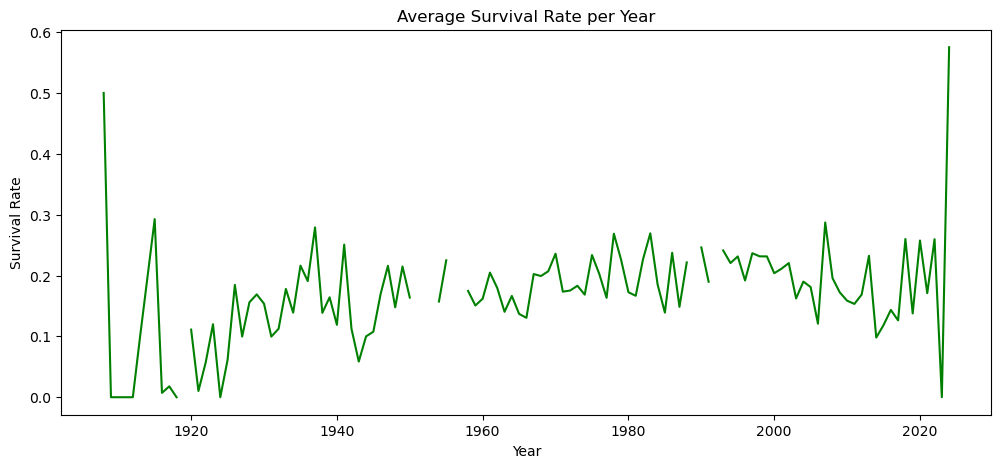

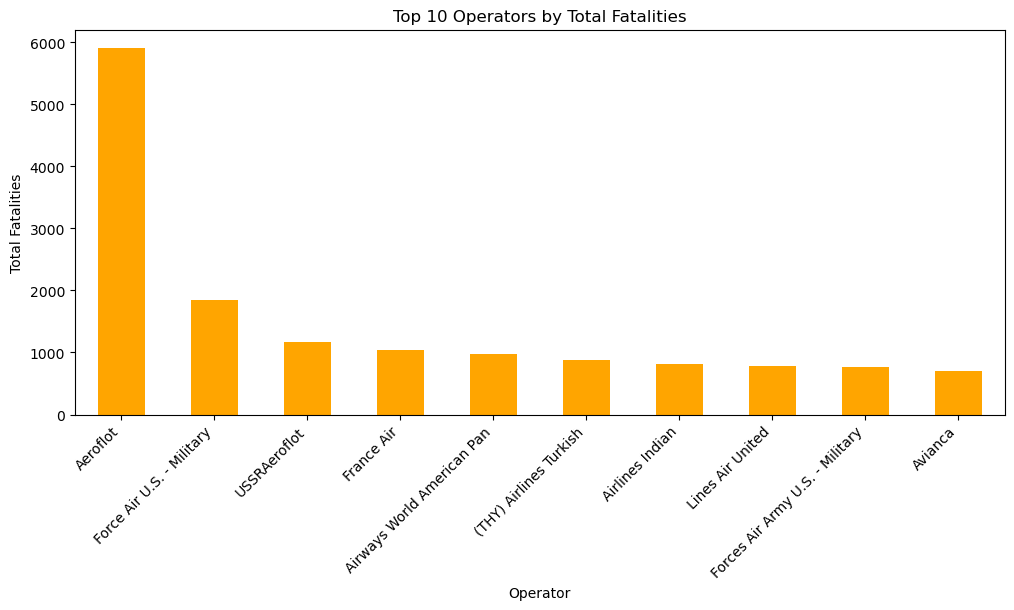

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

#load the dataset
df = pd.read_csv("aircrahesFullDataUpdated_2024.csv")

#remove rows with missing year, month, and day
df = df.dropna(subset=['Year', 'Month', 'Day'])

# converting month names to numbers
df['Month_Num'] = pd.to_datetime(df['Month'], format='%B').dt.month

# creating a datetime column
df['DateTime'] = pd.to_datetime(dict(year=df['Year'], month=df['Month_Num'], day=df['Day']))

# filling missing fatalities with 0
df['Fatalities (air)'] = df['Fatalities (air)'].fillna(0)
df['Aboard'] = df['Aboard'].fillna(0)

# calculating survivors and survival rate 
df['Survivors'] = df['Aboard'] - df['Fatalities (air)']
df['Survival_Rate'] = df['Survivors'] / df['Aboard']
df['Survival_Rate'] = df['Survival_Rate'].fillna(0)  # in case Aboard=0

# Visualizations
# Crashes per year
crashes_per_year = df.groupby('Year').size()
plt.figure(figsize=(12,5))
crashes_per_year.plot(kind='line')
plt.title("Airplane Crashes per Year")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
plt.show()

# Fatalities per year
fatalities_per_year = df.groupby('Year')['Fatalities (air)'].sum()
plt.figure(figsize=(12,5))
fatalities_per_year.plot(kind='line', color='red')
plt.title("Fatalities per Year")
plt.xlabel("Year")
plt.ylabel("Number of Fatalities")
plt.show()

# Average survival rate per year
survival_per_year = df.groupby('Year')['Survival_Rate'].mean()
plt.figure(figsize=(12,5))
survival_per_year.plot(kind='line', color='green')
plt.title("Average Survival Rate per Year")
plt.xlabel("Year")
plt.ylabel("Survival Rate")
plt.show()

# Top 10 operators by total fatalities
top_operators = df.groupby('Operator')['Fatalities (air)'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,5))
top_operators.plot(kind='bar', color='orange')
plt.title("Top 10 Operators by Total Fatalities")
plt.xlabel("Operator")
plt.ylabel("Total Fatalities")
plt.xticks(rotation=45, ha='right')
plt.show()


In [10]:
print(df.columns)


Index(['Year', 'Quarter', 'Month', 'Day', 'Country/Region',
       'Aircraft Manufacturer', 'Aircraft', 'Location', 'Operator', 'Ground',
       'Fatalities (air)', 'Aboard', 'Month_Num', 'DateTime', 'Survivors',
       'Survival_Rate'],
      dtype='object')
